In [2]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import math
%matplotlib inline

In [3]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]
Tensorflow version 1.13.1
Pandas version 0.24.2
Numpy version 1.16.2


In [4]:
# Create Test Data
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)
# let's compute y_data using 0.1 for m and 0.3 for b
train_y = 0.1*train_x + 0.3

In [18]:
# Pick a Large Learning Rate
# placeholders
x = tf.placeholder(tf.float32, name='01_x')
y = tf.placeholder(tf.float32, name='01_y')

# variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = W * train_x + b

# minimize the mean squared errors
loss = tf.reduce_mean(tf.square(pred-train_y))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [19]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(train_y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
# hold step and error values
t = []
# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)
    # fit the function.
    for step in range(6000):
        # get your data
        train_data = {x:train_x, y:train_y}
        # training in progress...
        sess.run(train, feed_dict=train_data)
        
        # capture the step and error for analysis
        t.append((step, sess.run(loss, feed_dict=train_data)))        
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval({x: train_x, y: train_y}))

Accuracy on the Training Set: 1.0


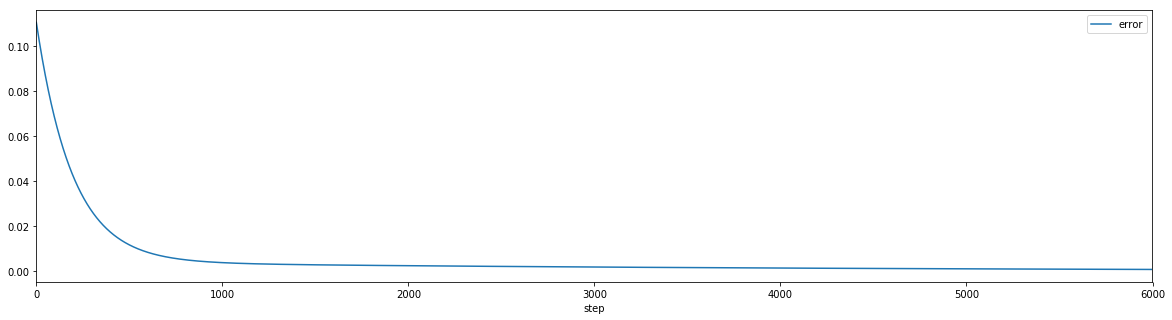

In [21]:
pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));